# Unveiling the Android App Market: Analyzing Google Play Store Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Oreva'

In [3]:
df = pd.read_csv('C:/Users/Oreva/Desktop/lecture/apps.csv', header=0)

In [4]:
df.shape

(9659, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [6]:
print(df.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [7]:
df.nunique()

Unnamed: 0        9659
App               9659
Category            33
Rating              39
Reviews           5330
Size               191
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2769
Android Ver         33
dtype: int64

In [8]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


##  Observation
- There are missing values present
- The unnamed column is not necessary
- price and install are strings
- last updated is not in a date time format

## handling unnecessary data

In [10]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Coverting the necssary column to a proper datatype 

In [12]:
df['Last Updated'] =pd.to_datetime(df['Last Updated']) # to date format
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).astype(float)
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)

C:\Users\Oreva\AppData\Local\Temp\ipykernel_16780\2318672605.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int32         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 943.4+ KB


In [14]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,20.395327,7.777507e+06,1.099299
std,0.536625,1.831320e+06,21.827509,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


## Handling Missing Values

In [15]:
# Fill missing values in the 'Rating' column with 0
df['Rating'].fillna(0, inplace=True)

In [16]:
df['Rating'].isnull().sum()

0

### Replacing missing values for Size is a bit trickier because the best approach depends on the data's distribution and context therefore using the median (or median per category) is usually the safest option, as it’s less affected by outliers than the mean.

In [17]:
# Replace missing Size values with median size by category
df['Size'] = df.groupby('Category')['Size'].apply(lambda x: x.fillna(x.median()))

In [18]:
df['Size'].isnull().sum()

0

In [19]:
# Drop rows with missing current ver values
df.dropna(subset=['Current Ver'], inplace=True)

In [20]:
df['Current Ver'].isnull().sum()

0

In [21]:
# Drop rows with missing current ver values
df.dropna(subset=['Android Ver'], inplace=True)

In [22]:
df['Android Ver'].isnull().sum()

0

## Analysis

Text(0, 0.5, 'Frequency')

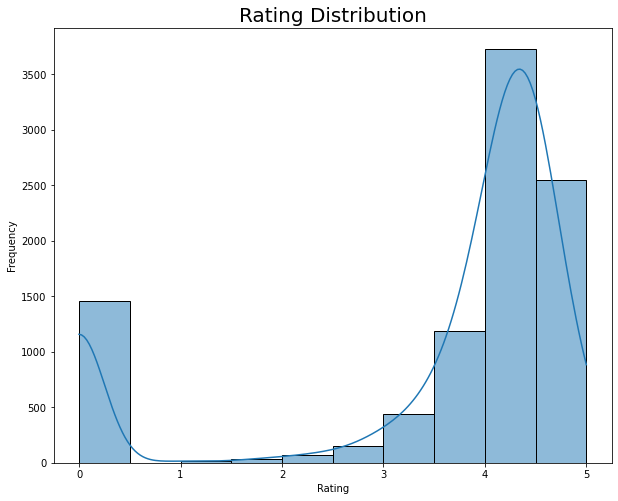

In [23]:
plt.figure(figsize=(10,8))
plt.title('Rating Distribution', fontsize=20)
sns.histplot(df['Rating'],bins=10,kde = True)
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [24]:
# Calculate average rating for each category
category_avg_rating = df.groupby('Category')['Rating'].mean().reset_index()

In [25]:
print(category_avg_rating)

               Category    Rating
0        ART_AND_DESIGN  4.168254
1     AUTO_AND_VEHICLES  3.598824
2                BEAUTY  3.390566
3   BOOKS_AND_REFERENCE  3.322624
4              BUSINESS  2.566429
5                COMICS  4.032143
6         COMMUNICATION  3.349524
7                DATING  3.111111
8             EDUCATION  4.327731
9         ENTERTAINMENT  4.135294
10               EVENTS  3.118750
11               FAMILY  3.672444
12              FINANCE  3.602609
13       FOOD_AND_DRINK  3.501786
14                 GAME  4.039208
15   HEALTH_AND_FITNESS  3.594792
16       HOUSE_AND_HOME  3.477027
17   LIBRARIES_AND_DEMO  3.172289
18            LIFESTYLE  3.339024
19  MAPS_AND_NAVIGATION  3.635878
20              MEDICAL  3.058987
21   NEWS_AND_MAGAZINES  3.310236
22            PARENTING  3.583333
23      PERSONALIZATION  3.428075
24          PHOTOGRAPHY  3.891103
25         PRODUCTIVITY  3.366845
26             SHOPPING  3.769307
27               SOCIAL  3.607531
28            

In [26]:
category_avg_rating.sort_values('Rating', ascending=False)

,Category,Rating
8,EDUCATION,4.327731
0,ART_AND_DESIGN,4.168254
9,ENTERTAINMENT,4.135294
14,GAME,4.039208
5,COMICS,4.032143
24,PHOTOGRAPHY,3.891103
32,WEATHER,3.867089
26,SHOPPING,3.769307
11,FAMILY,3.672444
31,VIDEO_PLAYERS,3.672393


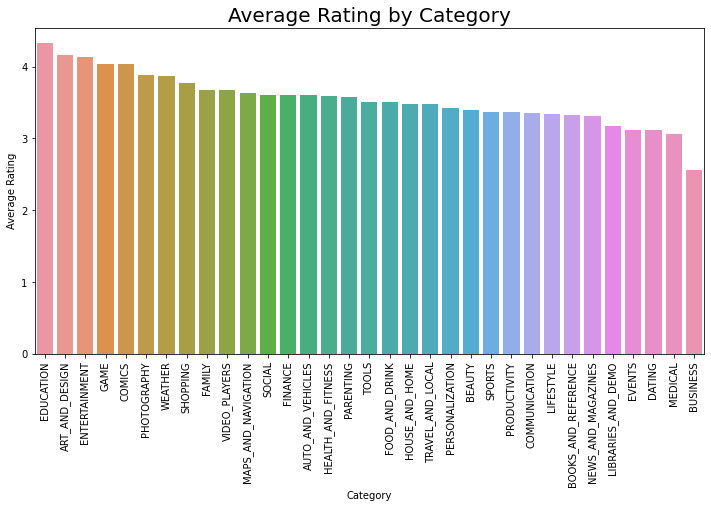

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Rating', data=category_avg_rating, order=category_avg_rating.sort_values('Rating', ascending=False)['Category'])
plt.xticks(rotation=90)
plt.title("Average Rating by Category",fontsize=20)
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

In [28]:
# Calculate average price for each category
category_avg_price = df.groupby('Category')['Price'].mean().reset_index()

In [29]:
category_avg_price.sort_values('Price', ascending=False)

,Category,Price
12,FINANCE,8.408203
18,LIFESTYLE,6.398022
20,MEDICAL,2.520759
10,EVENTS,1.718594
11,FAMILY,1.311575
25,PRODUCTIVITY,0.670936
3,BOOKS_AND_REFERENCE,0.541946
24,PHOTOGRAPHY,0.420925
4,BUSINESS,0.417357
32,WEATHER,0.410380


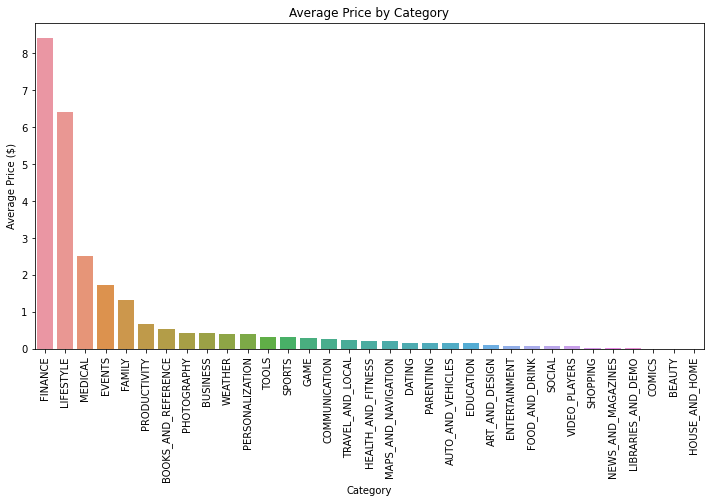

In [30]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Price', data=category_avg_price, order=category_avg_price.sort_values('Price', ascending=False)['Category'])
plt.xticks(rotation=90)
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price ($)")
plt.show()


In [31]:
# Calculate average price for each category
category_avg_install = df.groupby('Category')['Installs'].mean().reset_index()

In [32]:
category_avg_install.sort_values('Installs', ascending=False)

,Category,Installs
6,COMMUNICATION,3.504215e+07
31,VIDEO_PLAYERS,2.409143e+07
27,SOCIAL,2.296179e+07
9,ENTERTAINMENT,2.072216e+07
24,PHOTOGRAPHY,1.654501e+07
25,PRODUCTIVITY,1.548955e+07
14,GAME,1.447229e+07
30,TRAVEL_AND_LOCAL,1.321866e+07
29,TOOLS,9.698511e+06
21,NEWS_AND_MAGAZINES,9.327629e+06


In [33]:
# Categorize apps into "Free" and "Paid"
df['Type'] = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid')

# Check the distribution of free vs. paid apps
print(df['Type'].value_counts())


Free    8896
Paid     753
Name: Type, dtype: int64


<AxesSubplot:xlabel='Type', ylabel='count'>

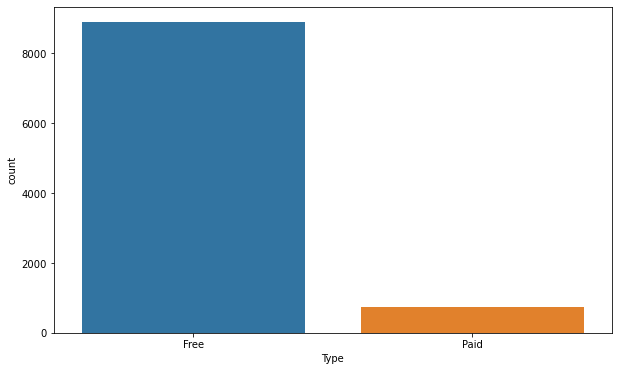

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type',data=df)

In [35]:
# average instal by size
size_avg_install = df.groupby('Size')['Installs'].mean().reset_index()

In [36]:
size_avg_install.sort_values('Installs', ascending=False)

,Size,Installs
57,5.70,7.845134e+07
171,76.00,7.227401e+07
80,7.90,6.319437e+07
74,7.35,5.539312e+07
100,9.65,5.347881e+07
...,...,...
34,3.40,9.952700e+04
81,8.00,8.642652e+04
11,1.10,7.470844e+04
8,0.80,7.208409e+04


## Recomendations

### 1. Category Performance Optimization
Insight: Categories like EDUCATION, ART_AND_DESIGN, and ENTERTAINMENT have the highest ratings, while BUSINESS and MEDICAL have low ratings.
#### Recommendation:
- Focus on High-Rating Categories: Promote and expand offerings in top-rated categories.
- Improve Low-Performing Categories: Analyze user feedback to identify pain points and implement improvements like better UI,     bug fixes, and faster loading times.

### 2. Pricing Strategy
Insight: Categories like FINANCE and LIFESTYLE have higher average prices, while many other categories are dominated by free apps.
Recommendation:
- Introduce Freemium Models: Offer basic features for free with premium upgrades to increase user conversions and revenue.
- Price Optimization: Ensure higher-priced apps offer clear value to users through premium features or services.
  Consider seasonal promotions and discounted pricing models to drive sales for paid apps.
  
### 3. Install Performance by Category
Insight: Categories like COMMUNICATION, SOCIAL, and VIDEO_PLAYERS dominate installs, while categories like DATING and MEDICAL have lower installs.
#### Recommendation:
- Target High-Install Categories: Focus development and marketing efforts on these categories to maximize downloads and engagement.
- Niche Strategy for Low-Install Categories: Use specialized marketing and partnerships to target niche audiences and boost visibility in smaller categories.

### 4. Monetization Strategy
Insight: High-install categories have significant potential for ad revenue and in-app purchases, while niche categories may benefit from targeted pricing models.
#### Recommendation:
- Implement ad-based monetization in high-install categories with a focus on maintaining a positive user experience.
- For smaller categories, offer subscription plans or tiered services to maximize revenue from dedicated users.

### 5. Size based Stretegy
Insight: There doesn’t seem to be a straightforward correlation between size and installs—some smaller apps have low installs, but others have extremely high installs.
Note:Users generally prefer smaller, optimized apps unless the app offers features that justify a larger size.
#### Recommendation:
- Optimize App Size: Reduce unnecessary bloat by compressing images, minimizing resource use, and using lightweight libraries.
- Feature Prioritization: Ensure all features in larger apps add clear value to users.
- App Size Communication: Highlight smaller app sizes in marketing, as users tend to prefer lighter apps that don’t take up too much storage.

  ### Futher insight on App Size
  
 ### 1. Small Apps with High Installs
Example: Apps with sizes like 5.70 MB and 7.90 MB have high install counts (e.g., 7.84M installs).
#### Recommendation:
Leverage Smaller Size as a Competitive Advantage: Promote the lightweight nature of the app as a selling point for users with limited storage space.
### 2. Large Apps with High Installs(Example: The app with 76 MB still managed 72.2M installs.)
- Insight: Large apps can succeed if they provide sufficient value (e.g., high-quality video content, advanced features, or social networking).
#### Recommendation:
- Offer App Lite Versions: For larger apps, consider creating a "Lite" version to target users with lower-end devices or limited storage.
- Communicate Value: Emphasize why the larger size is necessary (e.g., better graphics or more functionality).
### 3. Small Apps with Low Installs
Insight: Some small apps still have low installs despite their lightweight nature.
#### Recommendation:
- Improve Marketing: Focus on promoting the app’s benefits, targeting the right audiences, and increasing visibility through ads or social media.
- Feature Enhancement: Ensure the app has competitive and useful features to attract more downloads.
